In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


**<h1>Data Importing and Understanding**

In [3]:
df=pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**<h1>Checking Important Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**<h1>Insights**

<h4>
    
1. The dataset contains 16,598 rows and 11 columns.

2. There are two columns that contain null values: the "Year" column (271 null values) and the "Publisher" column (58 null values).
    
3. The year data ranges from 1980 to 2020.
    
4. Highest NA_Sales value: 41.49.
    
5. Highest EU_Sales value: 29.02.
    
6. Highest JP_Sales value: 10.22.
    
7. Highest Global_sales value: 82.74.

**<h1>Data Preprocessing and Cleaning**

In [8]:
df.Year.value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [9]:
df.Publisher.value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [10]:
# filled the null values with the next available year
df['Year'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_33/137373845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_33/137373845.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Year'].fillna(method='ffill', inplace=True)


In [11]:
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [12]:
df['Year'] = df['Year'].astype(int)

In [13]:
# filled the null values in the 'Publisher' column using the forward fill method 
df['Publisher'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_33/470114855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_33/470114855.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Publisher'].fillna(method='ffill', inplace=True)


In [14]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**<h1>Insights:**
    
<h4>
    
1. We checked the unique value counts for the 'Year' and 'Publisher' columns.

2. We filled the null values in the 'Year' and 'Publisher' columns using the forward fill method.

3. We changed the data type of the 'Year' column.

**<h1>Exploratory analysis and visualization**

In [15]:
# Importing visualization library
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'NA_Sales'}>],
       [<Axes: title={'center': 'EU_Sales'}>,
        <Axes: title={'center': 'JP_Sales'}>,
        <Axes: title={'center': 'Other_Sales'}>],
       [<Axes: title={'center': 'Global_Sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

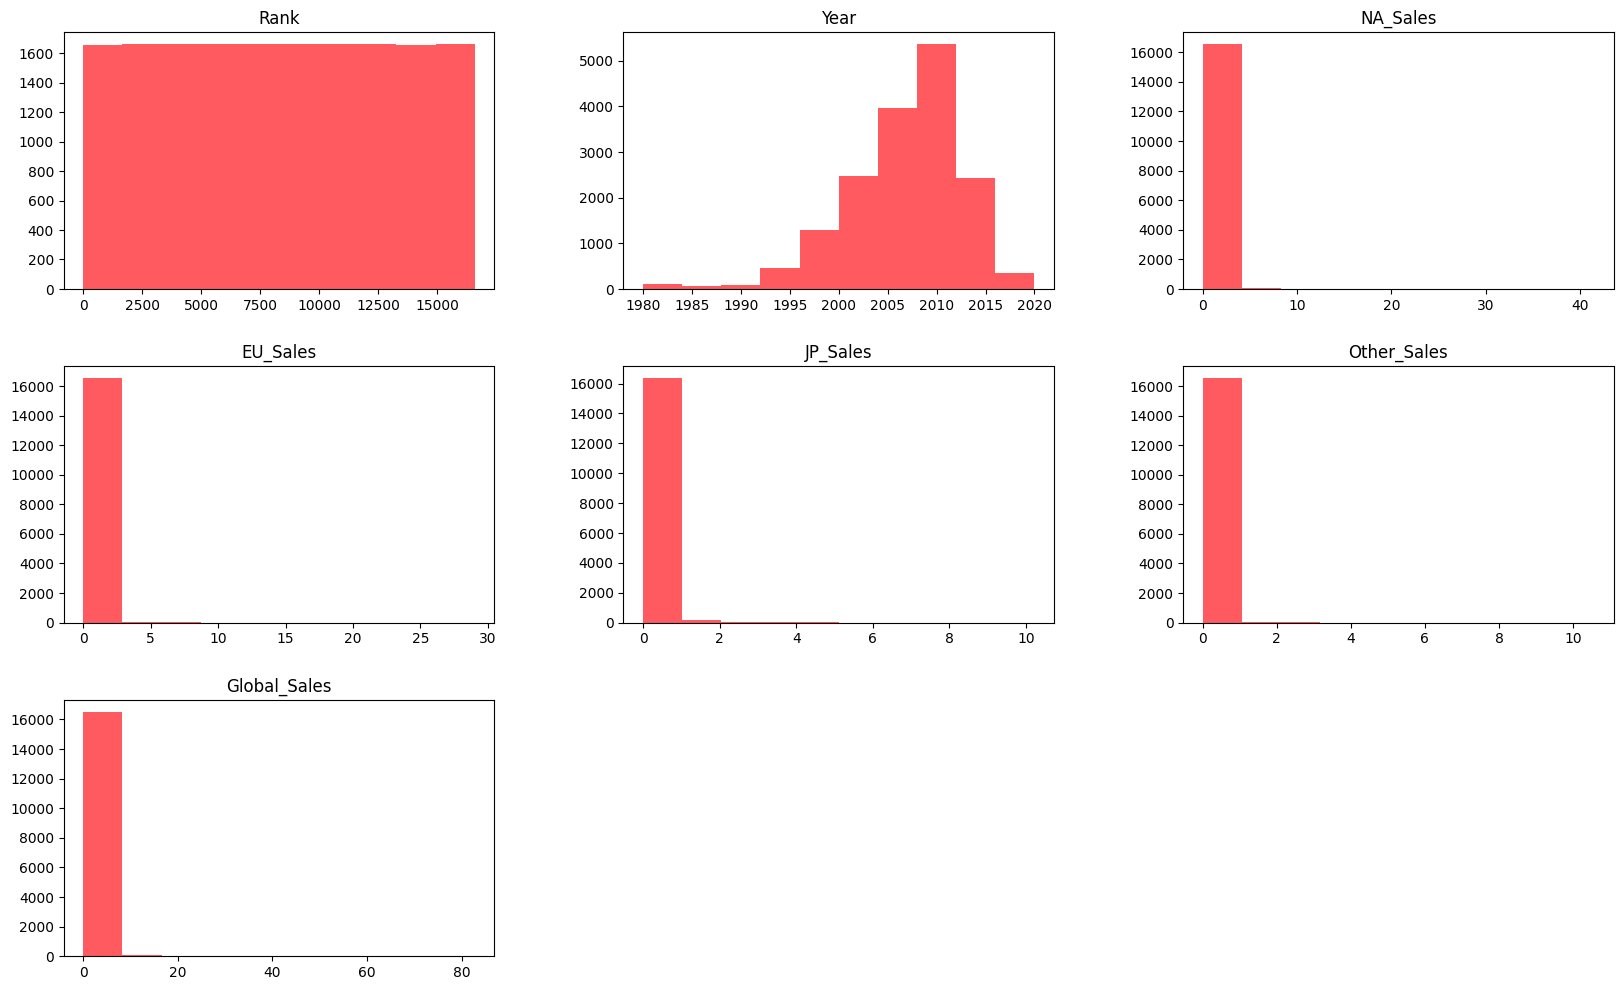

In [16]:
# We examined the patterns in numerical data by using histograms to visualize their distributions.
df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

**<h1>Task:-**

<h4>
    
1. What are the top-selling video games globally?

2. Which platform has the highest average sales per game?

3. How have video game sales evolved over the years?

4. Which genres are the most popular based on sales in different regions?

**<h2>1. What are the top-selling video games globally?**

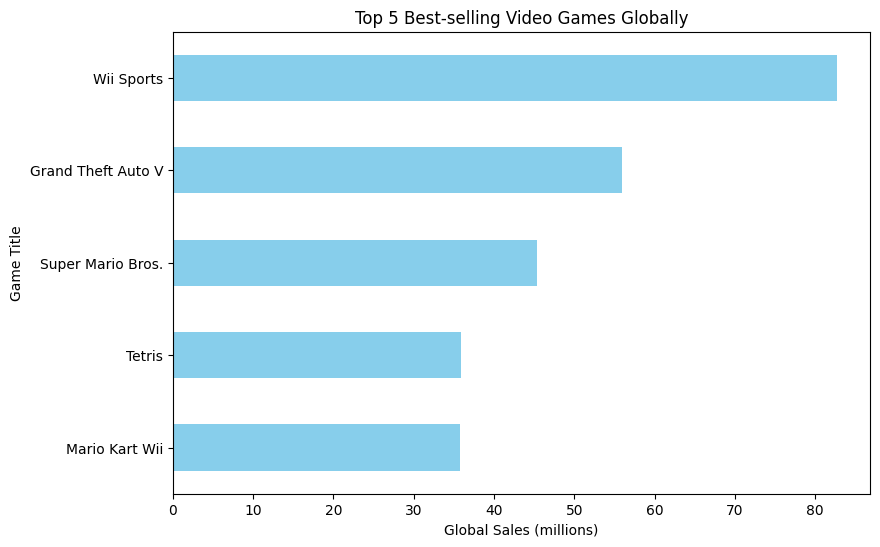

In [17]:
top_games = df.groupby('Name')['Global_Sales'].sum().nlargest(5)  # Select the top 10 games by global sales
plt.figure(figsize=(9, 6))
top_games.sort_values().plot(kind='barh', color='skyblue')  # Sort values to display in ascending order
plt.title('Top 5 Best-selling Video Games Globally')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game Title')
plt.show()

**<h2> 2. Which platform has the highest average sales?**

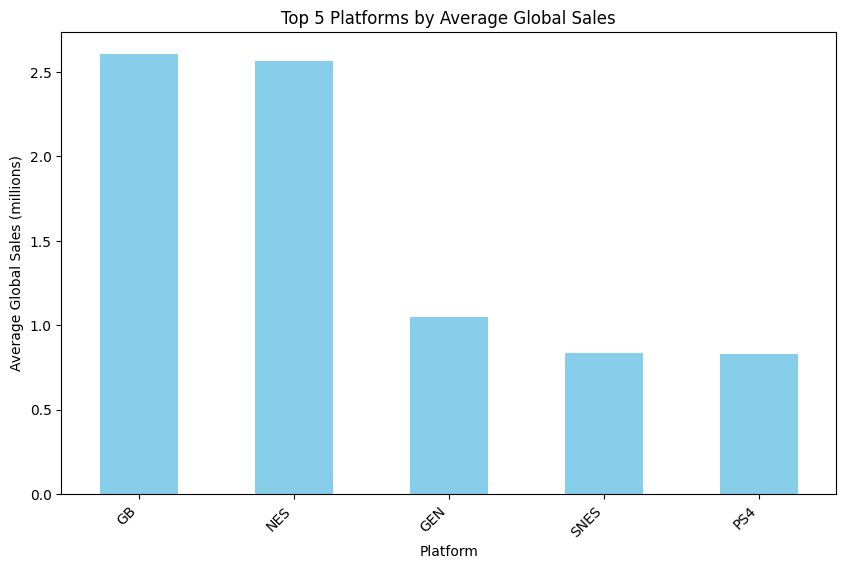

In [25]:
platform_avg_sales = df.groupby('Platform')['Global_Sales'].mean().nlargest(5)  # Top 10 platforms by average sales

# Plotting the platforms with the highest average sales
plt.figure(figsize=(10, 6))
platform_avg_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Platforms by Average Global Sales')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

**<h2>3. How have video game sales evolved over the years?**

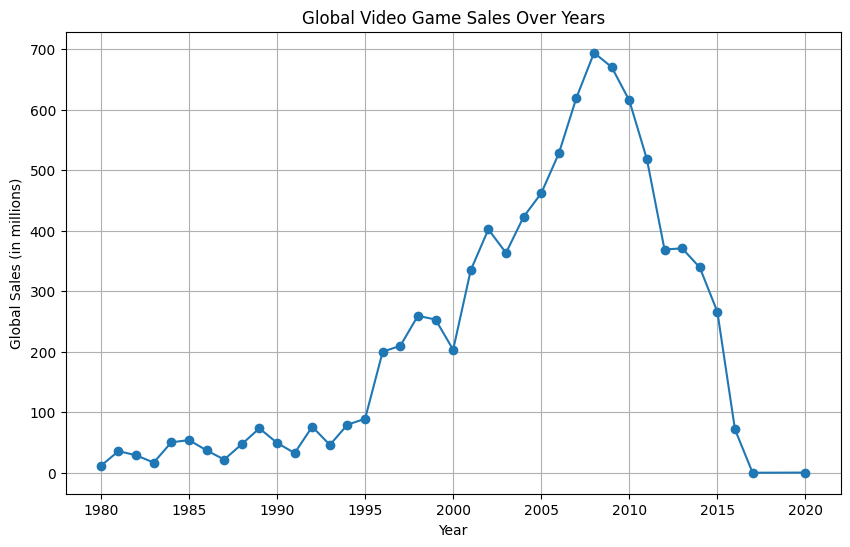

In [19]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotting the sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o')
plt.title('Global Video Game Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

**<h2>4. Which genres are the most popular based on sales in different regions?**

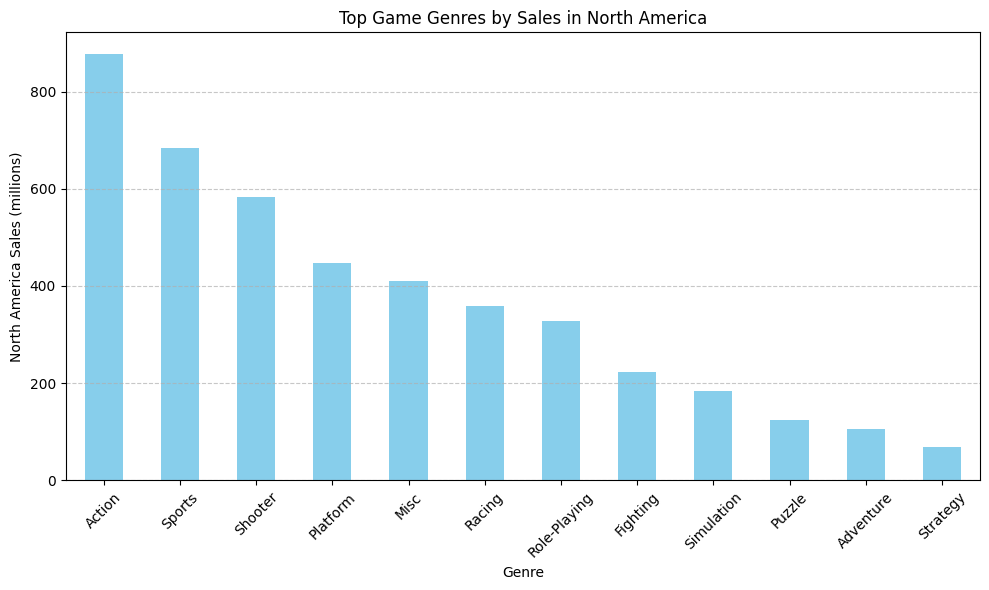

In [20]:
genre_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

# Plotting using pandas plot function
plt.figure(figsize=(10, 6))  # Set the figure size
genre_sales.plot(kind='bar', color='skyblue')  # Plotting a bar chart
plt.title('Top Game Genres by Sales in North America')
plt.xlabel('Genre')
plt.ylabel('North America Sales (millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

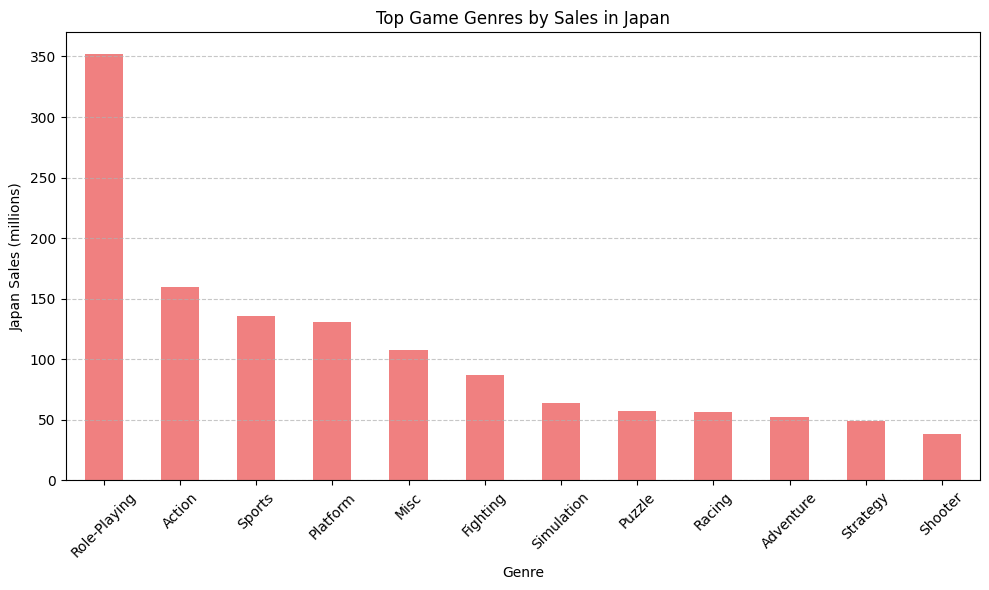

In [21]:
genre_sales_japan = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

# Plotting using pandas plot function
plt.figure(figsize=(10, 6))  # Set the figure size
genre_sales_japan.plot(kind='bar', color='lightcoral')  # Plotting a bar chart
plt.title('Top Game Genres by Sales in Japan')
plt.xlabel('Genre')
plt.ylabel('Japan Sales (millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

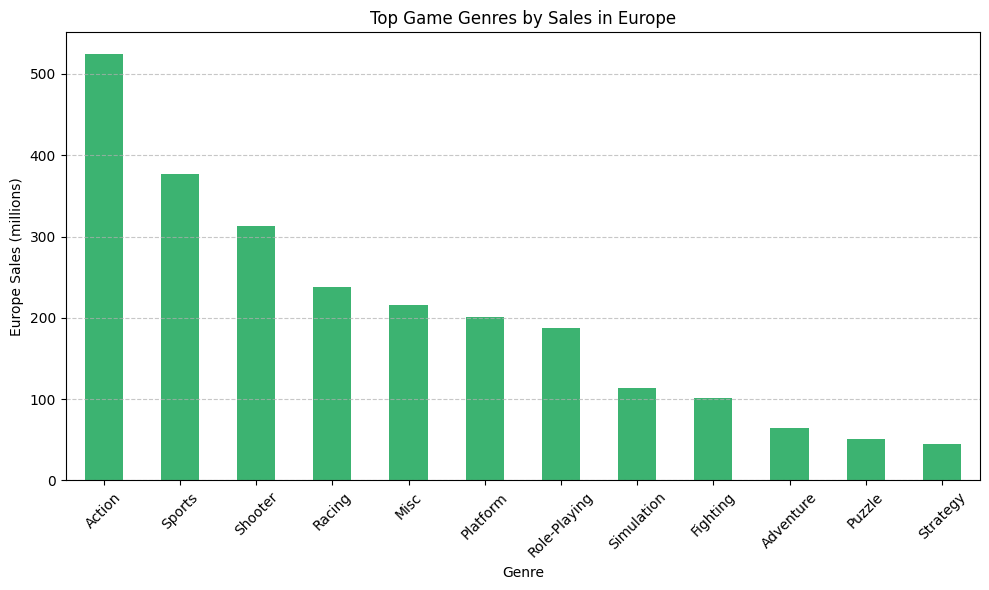

In [22]:
genre_sales_europe = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

# Plotting using pandas plot function
plt.figure(figsize=(10, 6))  # Set the figure size
genre_sales_europe.plot(kind='bar', color='mediumseagreen')  # Plotting a bar chart
plt.title('Top Game Genres by Sales in Europe')
plt.xlabel('Genre')
plt.ylabel('Europe Sales (millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

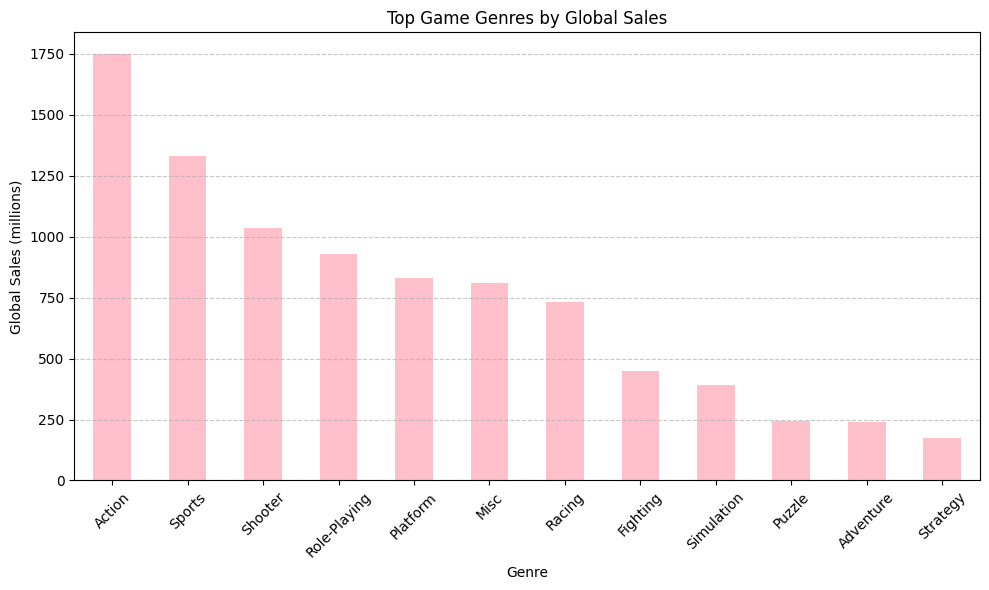

In [23]:
genre_sales_global = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Set the figure size
genre_sales_global.plot(kind='bar', color='pink')  # Plotting a bar chart
plt.title('Top Game Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

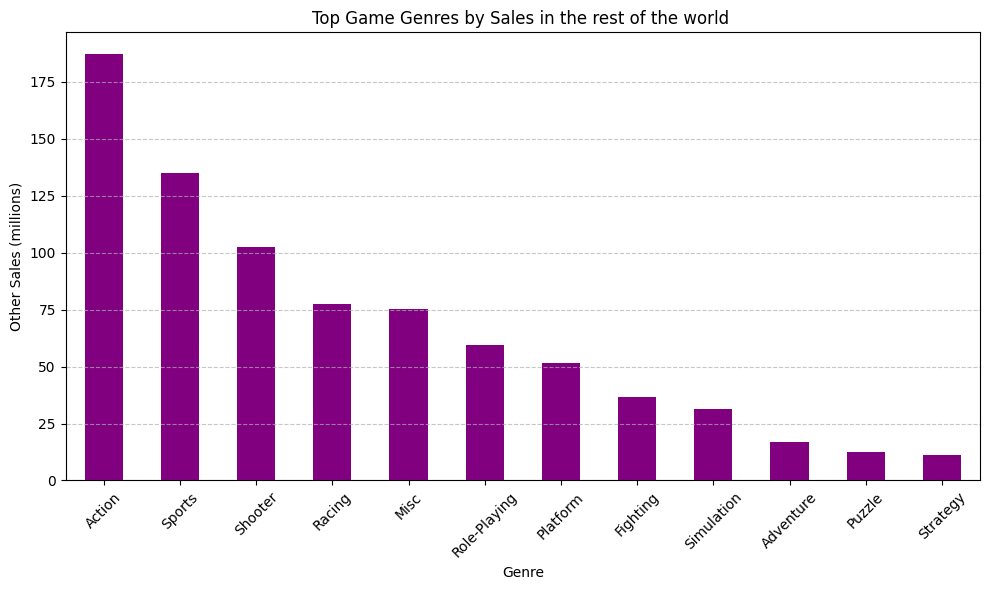

In [24]:
genre_sales_other = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

# Plotting using pandas plot function
plt.figure(figsize=(10, 6))  # Set the figure size
genre_sales_other.plot(kind='bar', color='purple')  # Plotting a bar chart
plt.title('Top Game Genres by Sales in the rest of the world ')
plt.xlabel('Genre')
plt.ylabel('Other Sales (millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**<h1>Conclusion**
    
<h4>    

1. Wii Sports, Grand Theft Auto V, Super Mario Bros, Tetris, and Mario Kart Wii are among the top 5 best-selling video games globally.

2. GB (Game Boy), NES (Nintendo Entertainment System), GEN (Sega Genesis), SNES (Super Nintendo Entertainment System), and PS4 (PlayStation 4) are the top 5 platforms by global sales.

3. The year 2018 had the highest video game sales globally.

4. The 'Action' genre has the highest sales in all regions except for Japan, where 'Sports' ranks as the second highest in sales. In Japan, the 'Role-Playing' genre has the highest sales, with 'Action' as the second highest.